# Informal Loan Exploration

In [9]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [11]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

### I first want to at least get the transaction date in the right format, I believe that we should do this for all dates and then save the new data in a csv format.

In [12]:
from datetime import date

### It would be good to first check in which format the entries in the columns are.

In [25]:
df.dtypes

hh_ids                         object
unique_hhs                    float64
first_trx_date_hh              object
last_trx_date_hh               object
tot_hh_daysofobs                int64
tot_hh_monthsofobs              int64
interview_designation          object
int_date                       object
int_month                       int64
int_year                        int64
int_yr_mo                      object
first_int_date                 object
account_ids                    object
unique_accnts                 float64
m_ids_owner                    object
unique_hm_owner               float64
account_bsheet_desig           object
account_startclose_balance     object
account_formal                 object
account_liquid                 object
first_trx_date_acc             object
last_trx_date_acc              object
tot_acc_daysofobs               int64
tot_acc_monthsofobs             int64
trx_id                          int64
m_ids_trx                      object
trx_date    

### We only have floats, integers and objects. Not sure what objects mean. Let's look at one of the entries.

In [23]:
type(df.loc[1,"trx_date"])

str

### Interesting, why would the type then not be str in the list of types above?

In [13]:
df.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,2013_10,08sep2012,58134738501900000,1.0,58134383397900000,NaN,Asset,Close,Informal,Less liquid,02oct2013,02oct2013,0,0,108138072959900000,58134383397900000,02oct2013,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,2013_04,20aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,59136660314000000,59134423954300000,21apr2013,4,2013,2013_04,10.0,209,7,248,8,cash,"Cash (Cash on hand; cash lost, stolen or missing)",CASH,Cash,3499,Cash on hand now,Cash on hand now (end of period),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,2013_02,07sep2012,61135001772200000,NaN,61134425330400000,NaN,Asset,NaN,Informal,More liquid,12oct2012,02oct2013,355,12,61136151231700000,61134425330400000,07feb2013,2,2013,2013_02,6.0,139,4,118,4,findev,"Borrowing, lending, savings or insurance media...",INFSAVHOM,Informal savings: keep money at home,3405,Keeping Money (Cash) at Home,3. Withdrawals,Withdrawal on financial asset,0.0,Decrease,1.0,Cash,NaN,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,2013_05,29aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,61136746749000000,61134468689200000,28mar2013,3,2013,2013_03,8.0,189,6,224,7,opex,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,NaN,NaN,NaN,1.0,Cash,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


In [14]:
df.insert(df.columns.get_loc("trx_date")+1,"trx_date2",[date(2000,1,1)]*df.shape[0])

In [15]:
df.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,2013_10,08sep2012,58134738501900000,1.0,58134383397900000,NaN,Asset,Close,Informal,Less liquid,02oct2013,02oct2013,0,0,108138072959900000,58134383397900000,02oct2013,2000-01-01,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,2013_04,20aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,59136660314000000,59134423954300000,21apr2013,2000-01-01,4,2013,2013_04,10.0,209,7,248,8,cash,"Cash (Cash on hand; cash lost, stolen or missing)",CASH,Cash,3499,Cash on hand now,Cash on hand now (end of period),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,2000-01-01,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,2013_02,07sep2012,61135001772200000,NaN,61134425330400000,NaN,Asset,NaN,Informal,More liquid,12oct2012,02oct2013,355,12,61136151231700000,61134425330400000,07feb2013,2000-01-01,2,2013,2013_02,6.0,139,4,118,4,findev,"Borrowing, lending, savings or insurance media...",INFSAVHOM,Informal savings: keep money at home,3405,Keeping Money (Cash) at Home,3. Withdrawals,Withdrawal on financial asset,0.0,Decrease,1.0,Cash,NaN,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,2013_05,29aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,61136746749000000,61134468689200000,28mar2013,2000-01-01,3,2013,2013_03,8.0,189,6,224,7,opex,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,NaN,NaN,NaN,1.0,Cash,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


In [16]:
for index, row in df.iterrows():
    day = int(df.loc[index,"trx_date"][0:2])
    year = int(df.loc[index,"trx_date"][5:9])
    if df.loc[index,"trx_date"][2:5] == "jan":
        month = 1
    elif df.loc[index,"trx_date"][2:5] == "feb":
        month = 2
    elif df.loc[index,"trx_date"][2:5] == "mar":
        month = 3
    elif df.loc[index,"trx_date"][2:5] == "apr":
        month = 4
    elif df.loc[index,"trx_date"][2:5] == "may":
        month = 5
    elif df.loc[index,"trx_date"][2:5] == "jun":
        month = 6
    elif df.loc[index,"trx_date"][2:5] == "jul":
        month = 7
    elif df.loc[index,"trx_date"][2:5] == "aug":
        month = 8
    elif df.loc[index,"trx_date"][2:5] == "sep":
        month = 9
    elif df.loc[index,"trx_date"][2:5] == "oct":
        month = 10
    elif df.loc[index,"trx_date"][2:5] == "nov":
        month = 11
    elif df.loc[index,"trx_date"][2:5] == "dec":
        month = 12
    else:
        print("The date seems to be in an odd format.",dfh.loc[index,"int_date"][0:2],dfh.loc[index,"int_date"][2:5],dfh.loc[index,"int_date"][5:9])
    
    df.at[index,"trx_date2"]=date(year,month,day)

In [28]:
df.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,2013_10,08sep2012,58134738501900000,1.0,58134383397900000,NaN,Asset,Close,Informal,Less liquid,02oct2013,02oct2013,0,0,108138072959900000,58134383397900000,02oct2013,2013-10-02,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,2013_04,20aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,59136660314000000,59134423954300000,21apr2013,2013-04-21,4,2013,2013_04,10.0,209,7,248,8,cash,"Cash (Cash on hand; cash lost, stolen or missing)",CASH,Cash,3499,Cash on hand now,Cash on hand now (end of period),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,2013-10-02,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,2013_02,07sep2012,61135001772200000,NaN,61134425330400000,NaN,Asset,NaN,Informal,More liquid,12oct2012,02oct2013,355,12,61136151231700000,61134425330400000,07feb2013,2013-02-07,2,2013,2013_02,6.0,139,4,118,4,findev,"Borrowing, lending, savings or insurance media...",INFSAVHOM,Informal savings: keep money at home,3405,Keeping Money (Cash) at Home,3. Withdrawals,Withdrawal on financial asset,0.0,Decrease,1.0,Cash,NaN,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,2013_05,29aug2012,HH,NaN,HH,NaN,NaN,NaN,NaN,NaN,16aug2012,31dec2013,502,17,61136746749000000,61134468689200000,28mar2013,2013-03-28,3,2013,2013_03,8.0,189,6,224,7,opex,Operational (Personal or household) expenditur...,COMM,Communications,2787,Pre-paid phone credit and data bundles,Purchases,NaN,NaN,NaN,1.0,Cash,NaN,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


# Let us look at the number of informal loans (INFGRP, INFP2P) vs formal loans (FRMLN)

In [26]:
df["trx_family_code"].describe()

count     483949
unique        44
top         FOOD
freq      163483
Name: trx_family_code, dtype: object

In [27]:
df["trx_family_code"].unique()

array(['INFP2P', 'CASH', 'INFGRP', 'INFSAVHOM', 'COMM', 'MOBMNY', 'SEI',
       'FOOD', 'SUPPCRD', 'FRMLN', 'ARREARS', 'FRMSAVWA', 'CITMPC', 'REI',
       'PERS', 'LAYAWAY', 'ENRGY', 'RG', 'FRMSAVRA', 'OTH', 'OTHER',
       'EDU', 'CLTH', 'RIOI', 'ADVANCE', 'TRNSP', 'EMPLN', 'RR', 'REL',
       'ENT', 'CLN', 'FRMINS', 'ALC', 'H20', 'AGRI', 'MED', 'PAWN',
       'PRCH', 'HSNG', 'PSTHR', 'LOSS', 'SALE', 'NEINCG', 'GIFT'],
      dtype=object)

In [29]:
df["trx_family_code"].value_counts()

FOOD         163483
SEI           71156
ENRGY         25273
COMM          25011
TRNSP         23549
INFGRP        20516
INFP2P        19828
MOBMNY        14665
CITMPC        12193
RR            10958
CLN           10589
H20            8967
AGRI           8115
CASH           7599
INFSAVHOM      7232
EDU            5438
FRMSAVWA       5352
PERS           4522
RIOI           4334
REL            4226
ALC            4144
SUPPCRD        4050
RG             3623
REI            3521
OTH            2938
MED            2389
CLTH           1725
HSNG           1505
FRMLN          1429
ARREARS        1402
FRMSAVRA       1220
PRCH            644
FRMINS          553
NEINCG          354
LAYAWAY         287
ADVANCE         280
SALE            229
ENT             183
PSTHR           163
OTHER           129
EMPLN           111
LOSS             26
GIFT             22
PAWN             16
Name: trx_family_code, dtype: int64

### We see that there are way more informal loans than formal loans. Eventhough micorcredit would probably be considered to be formal loans, I feel like we should also take advantage of the informal loans data.

# Let's only keep the informal loans. Since INFGRP seems to be closer to a formal loan than the other ones, let us first look at those.


In [33]:
dfi = df[df["trx_family_code"] == "INFGRP"]

In [40]:
dfi.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,2013-10-02,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.00000
13,KMAKE25,NaN,25sep2012,12oct2013,382,13,04=Diaries Interview,01oct2013,10,2013,2013_10,25sep2012,63134736324600000,NaN,63134458362700000,NaN,Insurance,Close,Informal,NaN,29sep2012,01oct2013,367,12,63138301746700000,63134458362700000,01oct2013,2013-10-01,10,2013,2013_10,19.0,371,12,367,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3248,Welfare Group,3. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,12.79310
20,KELDK27,NaN,23sep2012,06oct2013,378,13,04=Diaries Interview,06oct2013,10,2013,2013_10,26aug2012,105136651810500000,NaN,105136530871900000,NaN,Asset,Close,Informal,Less liquid,13apr2013,06oct2013,176,6,105138119212200000,105136530871900000,06oct2013,2013-10-06,10,2013,2013_10,18.0,378,13,176,6,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3335,Saving in a ROSCA,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.03448
26,KMOMM10,NaN,05sep2012,04nov2013,425,14,04=Diaries Interview,25sep2013,9,2013,2013_09,05sep2012,57136307716900000,NaN,57134320447800000,NaN,Asset,Close,Informal,Less liquid,05sep2012,04nov2013,425,14,57138010737300000,57134320447800000,25sep2013,2013-09-25,9,2013,2013_09,22.0,385,13,385,13,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3335,Saving in a ROSCA,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,8000.0,94.117650,0,NaN,NaN,NaN,13.27586
40,KNBOK05,NaN,01nov2012,02nov2013,366,12,04=Diaries Interview,01nov2013,11,2013,2013_11,11sep2012,50135816159000000,NaN,64134429266300000,NaN,Asset,Close,Informal,Less liquid,15nov2012,01nov2013,351,12,89138362764600000,64134429266300000,01nov2013,2013-11-01,11,2013,2013_11,22.0,365,12,351,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3335,Saving in a ROSCA,6. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,-450.0,-5.294117,0,NaN,NaN,NaN,12.58621


### In the column "account_bsheet_desig" we have liability, asset and insurance. This seems confusing to me. I thought that transactions with the class code "INFGRP" are supposed to only be loans.

### I want to check some other columns to see if these are really all only loans.

In [34]:
dfi["trx_class_code"].describe()

count      20516
unique         1
top       findev
freq       20516
Name: trx_class_code, dtype: object

### They are all financial devices, which is good.

In [38]:
dfi["trx_type_desc"].describe()

count                 20516
unique                    4
top       Saving in a ROSCA
freq                  13717
Name: trx_type_desc, dtype: object

In [39]:
dfi["trx_type_desc"].unique()

array(['Borrowing from an informal Group', 'Welfare Group',
       'Saving in a ROSCA', 'Saving in an ASCA'], dtype=object)

In [42]:
dfi["account_bsheet_desig"].unique()

array(['Liability', 'Insurance', 'Asset'], dtype=object)

### I just checked the handbook and it is not the case that all transactions with the code "INFGRP" are loans, there also are other kinds of financial devices with that code. We will need to additionally screen for the trx_type_code 3395.

In [43]:
dfi = dfi[dfi["trx_type_code"]==3395]

In [80]:
dfi.shape

(1377, 59)

In [82]:
df[df["trx_family_code"]=="FRMLN"].shape

(1429, 59)

## So there is a similar number of transactions linked to loans from informal groups and formal loans.

In [44]:
dfi.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,2013_10,05sep2012,56134804374600000,NaN,65134441430300000,NaN,Liability,Close,Informal,NaN,17oct2012,02oct2013,350,12,105138073330800000,65134441430300000,02oct2013,2013-10-02,10,2013,2013_10,17.0,377,13,350,12,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
96,KNBOK05,NaN,01nov2012,02nov2013,366,12,04=Diaries Interview,15mar2013,3,2013,2013_03,11sep2012,89136459180500000,NaN,64134429266300000,NaN,Liability,NaN,Informal,NaN,12feb2013,01nov2013,262,9,89136682215400000,64134429266300000,14mar2013,2013-03-14,3,2013,2013_03,7.0,133,4,30,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,600.0,7.058824,0,NaN,NaN,NaN,4.586207
211,KMAKE34,NaN,14sep2012,10oct2013,391,13,04=Diaries Interview,20jun2013,6,2013,2013_06,28aug2012,63137182523900000,NaN,63134364423800000,NaN,Liability,NaN,Informal,NaN,10jun2013,01oct2013,113,3,63137182717700000,63134364423800000,10jun2013,2013-06-10,6,2013,2013_06,13.0,269,9,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,200.0,2.352941,0,NaN,NaN,NaN,9.275862
217,KVIHC28,NaN,01oct2012,05oct2013,369,12,06=Cleaning interview,04oct2013,10,2013,2013_10,28sep2012,59134985308000000,NaN,59134388500400000,NaN,Liability,NaN,Informal,NaN,22nov2012,03oct2013,315,10,60138643199500000,59134388500400000,30dec2012,2012-12-30,12,2012,2012_12,19.0,90,3,38,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,1000.0,11.764710,0,NaN,NaN,NaN,3.103448
287,KMOMB16,NaN,03sep2012,30sep2013,392,13,04=Diaries Interview,30sep2013,9,2013,2013_09,20aug2012,57134667505500000,NaN,57134295592300000,NaN,Liability,Close,Informal,NaN,03sep2012,30sep2013,392,13,57138052924400000,57134295592300000,30sep2013,2013-09-30,9,2013,2013_09,22.0,392,13,392,13,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,350.0,4.117647,0,NaN,NaN,NaN,13.517240


In [46]:
dfi["account_bsheet_desig"].unique()

array(['Liability'], dtype=object)

In [47]:
dfi["trx_type_desc"].unique()

array(['Borrowing from an informal Group'], dtype=object)

### The last time I checked for the height of the loans using just a histogram for all the values associated to that code. But this does not actually make sense, since we are interested in the amount of the starting balance. Or when they take a new borrowing on an old loan, how much that is. So maybe the best way to get an idea of the distribution of the heights of loans would be to make a histogram of all starting balances and all new borrowing transactions. Let's see where that is recorded.

In [50]:
dfi["trx_prx_purpose"].unique()

array(['7. Closing Balance--End of last DQ', '5. Interest accruing',
       'INCREASE--Unexplained balance adjustment',
       'DECREASE--Unexplained balance adjustment',
       '1. Starting balance (today)', '3. Payments', '4. Any known fees',
       '2. New borrowing'], dtype=object)

###  We only want to keep the columns "starting balance" or "new borrowing" I believe. But to make sure, let's see how often there is an unexplained balance increase or decrease.

In [54]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")].shape

(21, 59)

### Ok not too often. I wonder if these are huge amounts. 

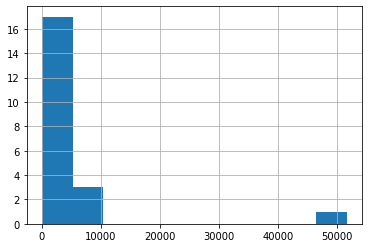

In [56]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["trx_value_kes"].hist()

In [196]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["trx_value_kes"].mean()

4575.9047619047615

### Ok not tiny. I wonder how many unique accounts this concerns.

In [58]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["account_ids"].value_counts()

59134744923800000    1
89136147514200000    1
59134752803800000    1
59134874164800000    1
59135453668400000    1
63137411946300000    1
59134796449500000    1
63135365595900000    1
58134808684000000    1
61134761356700000    1
50135720216700000    1
59134864183300000    1
62134812582900000    1
89136197072500000    1
59134865147600000    1
59135453645700000    1
50135823715900000    1
59134794957300000    1
89136446053700000    1
50136213203700000    1
89137171306900000    1
Name: account_ids, dtype: int64

In [65]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")][["trx_bsheet_direction", "trx_direction","trx_value_kes"]]

,trx_bsheet_direction,trx_direction,trx_value_kes
612,Increase,NaN,2500.0
835,Decrease,NaN,1800.0
1518,Increase,NaN,500.0
3401,Decrease,NaN,6200.0
5704,Decrease,NaN,7000.0
8661,Increase,NaN,1450.0
9602,Increase,NaN,51570.0
10732,Decrease,NaN,1600.0
10887,Decrease,NaN,260.0
11496,Increase,NaN,1500.0


### We definitely need to think about what to do about these unexplained movements.

# Let us now look at the height of the informal loans.

In [67]:
dfi[(dfi["trx_prx_purpose"]=="1. Starting balance (today)")|(dfi["trx_prx_purpose"]=="2. New borrowing")].head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
1022,KMAKL12,1.0,27sep2012,01oct2013,369,12,03=Q3,27sep2012,9,2012,2012_09,30aug2012,65134752879600000,1.0,65134389716400000,NaN,Liability,Start,Informal,NaN,27sep2012,01oct2013,369,12,65134916300000000,65134389716400000,27sep2012,2012-09-27,9,2012,2012_09,1.0,0,0,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,10000.0,117.64710,0,NaN,NaN,NaN,0.000000
1415,KVIHC34,NaN,08sep2012,24oct2013,411,14,04=Diaries Interview,24oct2012,10,2012,2012_10,29aug2012,59134865147600000,1.0,59134380191400000,NaN,Liability,Start,Informal,NaN,24oct2012,09oct2013,350,12,59135108447400000,59134380191400000,24oct2012,2012-10-24,10,2012,2012_10,1.0,46,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,17680.0,208.00000,0,NaN,NaN,NaN,1.586207
1497,KMAKE30,NaN,04oct2012,27sep2013,358,12,04=Diaries Interview,11oct2012,10,2012,2012_10,30aug2012,63134753070600000,1.0,63134382172900000,NaN,Liability,Start,Informal,NaN,04oct2012,26sep2013,357,12,63135020922500000,63134382172900000,04oct2012,2012-10-04,10,2012,2012_10,2.0,0,0,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,15000.0,176.47060,0,NaN,NaN,NaN,0.000000
1701,KVIHC29,NaN,08aug2012,15aug2013,372,12,04=Diaries Interview,08oct2012,10,2012,2012_10,20aug2012,59134666385100000,NaN,59134423101700000,NaN,Liability,Start,Informal,NaN,03sep2012,01aug2013,332,11,59134968898000000,59134423101700000,08oct2012,2012-10-08,10,2012,2012_10,1.0,61,2,35,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,2000.0,23.52941,0,NaN,NaN,NaN,2.103448
1996,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,06dec2012,12,2012,2012_12,29nov2012,50135720216700000,1.0,50135417760600000,NaN,Liability,Start,Informal,NaN,06dec2012,24oct2013,322,11,50135720221400000,50135417760600000,06dec2012,2012-12-06,12,2012,2012_12,1.0,22,0,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,20000.0,235.29410,0,NaN,NaN,NaN,0.758621


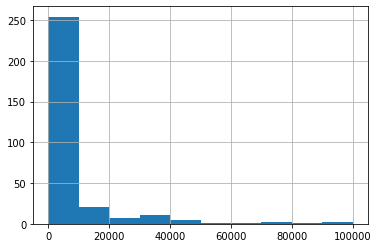

In [68]:
dfi[(dfi["trx_prx_purpose"]=="1. Starting balance (today)")|(dfi["trx_prx_purpose"]=="2. New borrowing")]["trx_value_kes"].hist()

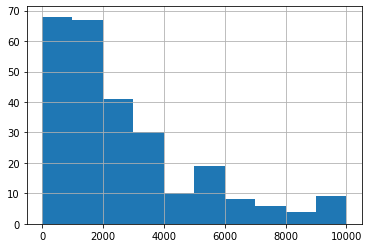

In [71]:
dfi[((dfi["trx_prx_purpose"]=="1. Starting balance (today)")|(dfi["trx_prx_purpose"]=="2. New borrowing"))& (dfi["trx_value_kes"] <= 10000)]["trx_value_kes"].hist()

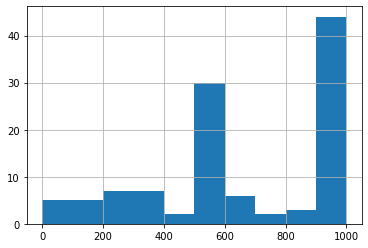

In [73]:
dfi[((dfi["trx_prx_purpose"]=="1. Starting balance (today)")|(dfi["trx_prx_purpose"]=="2. New borrowing"))& (dfi["trx_value_kes"] <= 1000)]["trx_value_kes"].hist()

### Let us see if we also have negative values, i.e. mistakes here.

In [77]:
dfi[dfi["trx_value_kes"]<0]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr


### Doesn't look like it.

## To see how well we can evaluate whether a person paid back their loan or not, we would need to follow the evolution of a single loan. To this goal I want to choose one loan among the above and follow its evolution. 

In [78]:
dfi["account_ids"].count()

1377

In [83]:
dfi["account_ids"].describe()

count                  1377
unique                  159
top       89135780169200000
freq                     47
Name: account_ids, dtype: object

In [84]:
import random 
acc = random.choice(dfi["account_ids"].unique())

In [85]:
print(acc)

89136446053700000


### I used a = 89136446053700000.

In [91]:
lna = dfi[dfi["account_ids"]==acc]

In [92]:
lna.shape

(27, 59)

### Let's look at this one account.

In [93]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
199468,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,14mar2013,3,2013,2013_03,29nov2012,89136446053700000,1.0,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136446069000000,50135417760600000,03mar2013,2013-03-03,3,2013,2013_03,6.0,109,3,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,2000.0,23.529410,0,NaN,NaN,NaN,3.758621
412526,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,28mar2013,3,2013,2013_03,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136446769100000,50135417760600000,17mar2013,2013-03-17,3,2013,2013_03,7.0,123,4,14,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,200.0,2.352941,0,NaN,NaN,NaN,4.241379
412525,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,28mar2013,3,2013,2013_03,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136446771600000,50135417760600000,24mar2013,2013-03-24,3,2013,2013_03,7.0,130,4,21,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,200.0,2.352941,0,NaN,NaN,NaN,4.482759
117531,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,11apr2013,4,2013,2013_04,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136566120600000,50135417760600000,31mar2013,2013-03-31,3,2013,2013_03,8.0,137,4,28,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,200.0,2.352941,0,NaN,NaN,NaN,4.724138
209484,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,11apr2013,4,2013,2013_04,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136566122200000,50135417760600000,07apr2013,2013-04-07,4,2013,2013_04,8.0,144,4,35,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,200.0,2.352941,0,NaN,NaN,NaN,4.965517
46498,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,25apr2013,4,2013,2013_04,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136687016400000,50135417760600000,14apr2013,2013-04-14,4,2013,2013_04,9.0,151,5,42,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrow

In [94]:
lna["trx_stdtime_days_acc"]

199468      0
412526     14
412525     21
117531     28
209484     35
46498      42
412520     49
326108     62
207674     70
24509      77
71936      77
312531     84
330030     91
394024     91
328290     98
412510    112
344082    119
412505    126
400004    133
412502    140
29361     147
147334    154
93219     161
189672    175
122044    182
26757     235
8661      235
Name: trx_stdtime_days_acc, dtype: int64

### The loan was inplace for 235 days.
###  There is no starting balance but a closing balance.

## Let us again check if outflow and inflow all work out.
### Inflow and Outflow refers to the individual's standpoint, so it is an outflow when people pay money into the account. Decrease and Increase are about the balance of the account. If the account is a loan, then decrease means that the loan is being payed back. I feel like for loans, Outflows should mostly correspond to decreases. Let's check that.

In [95]:
lna[(lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Inflow") ]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr


In [96]:
lna[(lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Outflow") ]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr


In [97]:
lna[(lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")].shape

(21, 59)

In [98]:
lna[(lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow") ].shape

(3, 59)

### There seem to be a few entries that do not fall into these categories. Let's look at them.

In [101]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))].shape

(3, 59)

In [100]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
24509,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,23may2013,5,2013,2013_05,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136929110100000,50135417760600000,19may2013,2013-05-19,5,2013,2013_05,11.0,186,6,77,2,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,200.0,2.352941,0,NaN,NaN,NaN,6.413793
26757,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,24oct2013,10,2013,2013_10,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,Close,Informal,NaN,03mar2013,24oct2013,235,8,89138259521800000,50135417760600000,24oct2013,2013-10-24,10,2013,2013_10,22.0,344,11,235,8,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,1.0,0.0,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,11.862070
8661,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,24oct2013,10,2013,2013_10,29nov2012,89136446053700000,NaN,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,51140471171800000,50135417760600000,24oct2013,2013-10-24,10,2013,2013_10,22.0,344,11,235,8,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,INCREASE--Unexplained balance adjustment,NaN,0.0,Increase,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,1450.0,17.058820,0,NaN,NaN,NaN,11.862070


### So we have no In or outflow for interest accruing, unexplained increase of balance and the closing balance. This all makes sense.
### Also there is no increase or decrease of the account balance when the closing balance is recorded.
### But there are two different closing balances, that is clear to me.

### Now we want to understand the evolution of the balance of a loan account.

In [102]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [103]:
lna.head(1)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_val_dir,trx_stdtime_mnths_hh_nr
199468,KNBOK42,NaN,14nov2012,24oct2013,344,11,04=Diaries Interview,14mar2013,3,2013,2013_03,29nov2012,89136446053700000,1.0,50135417760600000,NaN,Liability,NaN,Informal,NaN,03mar2013,24oct2013,235,8,89136446069000000,50135417760600000,03mar2013,2013-03-03,3,2013,2013_03,6.0,109,3,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,2000.0,23.52941,0,NaN,NaN,NaN,0.0,3.758621


In [105]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index26757


In [106]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
199468,0,2000.0,2. New borrowing,Inflow,Increase,2000.0
412526,14,200.0,3. Payments,Outflow,Decrease,-200.0
412525,21,200.0,3. Payments,Outflow,Decrease,-200.0
117531,28,200.0,3. Payments,Outflow,Decrease,-200.0
209484,35,200.0,3. Payments,Outflow,Decrease,-200.0
46498,42,200.0,3. Payments,Outflow,Decrease,-200.0
412520,49,200.0,3. Payments,Outflow,Decrease,-200.0
326108,62,200.0,3. Payments,Outflow,Decrease,-200.0
207674,70,500.0,3. Payments,Outflow,Decrease,-500.0
24509,77,200.0,5. Interest accruing,NaN,Increase,200.0


In [107]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [108]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [109]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
199468,0,2000.0,2. New borrowing,Inflow,Increase,2000.0,2000.0
412526,14,200.0,3. Payments,Outflow,Decrease,-200.0,1800.0
412525,21,200.0,3. Payments,Outflow,Decrease,-200.0,1600.0
117531,28,200.0,3. Payments,Outflow,Decrease,-200.0,1400.0
209484,35,200.0,3. Payments,Outflow,Decrease,-200.0,1200.0
46498,42,200.0,3. Payments,Outflow,Decrease,-200.0,1000.0
412520,49,200.0,3. Payments,Outflow,Decrease,-200.0,800.0
326108,62,200.0,3. Payments,Outflow,Decrease,-200.0,600.0
207674,70,500.0,3. Payments,Outflow,Decrease,-500.0,100.0
24509,77,200.0,5. Interest accruing,NaN,Increase,200.0,300.0


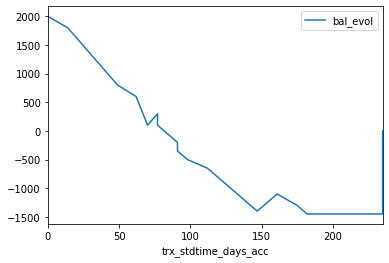

In [110]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## This loan seems to be a bit misterious. First they take a loan, then they continue paying into the loan, eventhough they apparently finished paying it back.

## Let's look at the evolution of the balance of a different account.

In [121]:
a = random.choice(dfi["account_ids"].unique())
print(a)

89135910908900000


### I used a = 89135910908900000. 

In [122]:
lna = dfi[dfi["account_ids"]==a]

In [123]:
lna.shape

(11, 59)

### Let's look at this one account.

In [124]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
5566,KNBOK03,NaN,01nov2012,22oct2013,355,12,04=Diaries Interview,27mar2013,3,2013,2013_03,21nov2012,89135910908900000,1.0,64134408292500000,NaN,Liability,Start,Informal,NaN,12mar2013,22oct2013,224,7,89136437058200000,64134408292500000,12mar2013,2013-03-12,3,2013,2013_03,7.0,131,4,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,30000.0,352.94120,0,NaN,NaN,NaN,4.517241
334199,KNBOK03,NaN,01nov2012,22oct2013,355,12,04=Diaries Interview,27mar2013,3,2013,2013_03,21nov2012,89135910908900000,NaN,64134408292500000,NaN,Liability,NaN,Informal,NaN,12mar2013,22oct2013,224,7,89136437073600000,64134408292500000,14mar2013,2013-03-14,3,2013,2013_03,7.0,133,4,2,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,3000.0,35.29412,0,NaN,NaN,NaN,4.586207
179026,KNBOK03,NaN,01nov2012,22oct2013,355,12,06=Cleaning interview,23oct2013,10,2013,2013_10,21nov2012,89135910908900000,NaN,64134408292500000,NaN,Liability,NaN,Informal,NaN,12mar2013,22oct2013,224,7,89138627378600000,64134408292500000,11apr2013,2013-04-11,4,2013,2013_04,20.0,161,5,30,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,2000.0,23.52941,0,NaN,NaN,NaN,5.551724
274867,KNBOK03,NaN,01nov2012,22oct2013,355,12,06=Cleaning interview,23oct2013,10,2013,2013_10,21nov2012,89135910908900000,NaN,64134408292500000,NaN,Liability,NaN,Informal,NaN,12mar2013,22oct2013,224,7,89138627389300000,64134408292500000,09may2013,2013-05-09,5,2013,2013_05,20.0,189,6,58,2,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,2000.0,23.52941,0,NaN,NaN,NaN,6.517241
378952,KNBOK03,NaN,01nov2012,22oct2013,355,12,06=Cleaning interview,23oct2013,10,2013,2013_10,21nov2012,89135910908900000,NaN,64134408292500000,NaN,Liability,NaN,Informal,NaN,12mar2013,22oct2013,224,7,89138627389300000,64134408292500000,13jun2013,2013-06-13,6,2013,2013_06,20.0,224,7,93,3,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,2000.0,23.52941,0,NaN,NaN,NaN,7.724138
280362,KNBOK03,NaN,01nov2012,22oct2013,355,12,06=Cleaning interview,23oct2013,10,2013,2013_10,21nov2012,89135910908900000,NaN,64134408292500000,NaN,Liability,NaN,Informal,NaN,12mar2013,22oct2013,224,7,89138627389300000,64134408292500000,11jul2013,2013-07-11,7,2013,2013_07,20.0,252,8,121,4,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing fro

In [125]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [126]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index12887


In [127]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
5566,0,30000.0,1. Starting balance (today),NaN,Increase,30000.0
334199,2,3000.0,3. Payments,Outflow,Decrease,-3000.0
179026,30,2000.0,3. Payments,Outflow,Decrease,-2000.0
274867,58,2000.0,3. Payments,Outflow,Decrease,-2000.0
378952,93,2000.0,3. Payments,Outflow,Decrease,-2000.0
280362,121,2000.0,3. Payments,Outflow,Decrease,-2000.0
306980,149,2000.0,3. Payments,Outflow,Decrease,-2000.0
407639,184,2000.0,3. Payments,Outflow,Decrease,-2000.0
149134,205,2000.0,3. Payments,Outflow,Decrease,-2000.0
203370,213,3000.0,3. Payments,Outflow,Decrease,-3000.0


In [128]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [129]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [130]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
5566,0,30000.0,1. Starting balance (today),NaN,Increase,30000.0,30000.0
334199,2,3000.0,3. Payments,Outflow,Decrease,-3000.0,27000.0
179026,30,2000.0,3. Payments,Outflow,Decrease,-2000.0,25000.0
274867,58,2000.0,3. Payments,Outflow,Decrease,-2000.0,23000.0
378952,93,2000.0,3. Payments,Outflow,Decrease,-2000.0,21000.0
280362,121,2000.0,3. Payments,Outflow,Decrease,-2000.0,19000.0
306980,149,2000.0,3. Payments,Outflow,Decrease,-2000.0,17000.0
407639,184,2000.0,3. Payments,Outflow,Decrease,-2000.0,15000.0
149134,205,2000.0,3. Payments,Outflow,Decrease,-2000.0,13000.0
203370,213,3000.0,3. Payments,Outflow,Decrease,-3000.0,10000.0


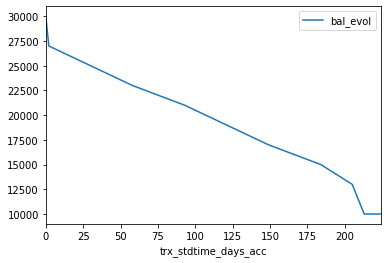

In [131]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's look at the evolution of the balance of a different account.

In [133]:
a = random.choice(dfi["account_ids"].unique())
print(a)

59134856295000000


### I used a = 59134856295000000. 

In [134]:
lna = dfi[dfi["account_ids"]==a]

In [135]:
lna.shape

(8, 59)

### Let's look at this one account.

In [136]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
15160,KVIHC36,NaN,08sep2012,30sep2013,387,13,04=Diaries Interview,02nov2012,11,2012,2012_11,27aug2012,59134856295000000,1.0,59134371287500000,NaN,Liability,Start,Informal,NaN,02nov2012,25sep2013,327,11,59135184202500000,59134371287500000,02nov2012,2012-11-02,11,2012,2012_11,1.0,55,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,3000.0,35.294120,0,NaN,NaN,NaN,1.896552
12029,KVIHC36,NaN,08sep2012,30sep2013,387,13,06=Cleaning interview,26sep2013,9,2013,2013_09,27aug2012,59134856295000000,NaN,59134371287500000,NaN,Liability,NaN,Informal,NaN,02nov2012,25sep2013,327,11,60138724049400000,59134371287500000,04nov2012,2012-11-04,11,2012,2012_11,20.0,57,1,2,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,5200.0,61.176470,0,NaN,NaN,NaN,1.965517
140303,KVIHC36,NaN,08sep2012,30sep2013,387,13,04=Diaries Interview,15jan2013,1,2013,2013_01,27aug2012,59134856295000000,NaN,59134371287500000,NaN,Liability,NaN,Informal,NaN,02nov2012,25sep2013,327,11,59135823400400000,59134371287500000,11dec2012,2012-12-11,12,2012,2012_12,4.0,94,3,39,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,3200.0,37.647060,0,NaN,NaN,NaN,3.241379
136647,KVIHC36,NaN,08sep2012,30sep2013,387,13,04=Diaries Interview,19mar2013,3,2013,2013_03,27aug2012,59134856295000000,NaN,59134371287500000,NaN,Liability,NaN,Informal,NaN,02nov2012,25sep2013,327,11,59136368006800000,59134371287500000,11mar2013,2013-03-11,3,2013,2013_03,7.0,184,6,129,4,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,3000.0,35.294120,0,NaN,NaN,NaN,6.344828
406920,KVIHC36,NaN,08sep2012,30sep2013,387,13,04=Diaries Interview,19mar2013,3,2013,2013_03,27aug2012,59134856295000000,NaN,59134371287500000,NaN,Liability,NaN,Informal,NaN,02nov2012,25sep2013,327,11,59136368008700000,59134371287500000,11mar2013,2013-03-11,3,2013,2013_03,7.0,184,6,129,4,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,600.0,7.058824,0,NaN,NaN,NaN,6.344828
249721,KVIHC36,NaN,08sep2012,30sep2013,387,13,06=Cleaning interview,26sep2013,9,2013,2013_09,27aug2012,59134856295000000,NaN,59134371287500000,NaN,Liability,NaN,Informal,NaN,02nov2012,25sep2013,327,11,60138724067900000,59134371287500000,08jun2013,2013-06-08,6,2013,2013_06,20.0,273,9,218,7,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Paym

In [137]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [138]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 10511.


In [141]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","trx_date2"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,trx_date2
15160,0,3000.0,1. Starting balance (today),NaN,Increase,3000.0,2012-11-02
12029,2,5200.0,5. Interest accruing,NaN,Increase,5200.0,2012-11-04
140303,39,3200.0,3. Payments,Outflow,Decrease,-3200.0,2012-12-11
136647,129,3000.0,2. New borrowing,Inflow,Increase,3000.0,2013-03-11
406920,129,600.0,3. Payments,Outflow,Decrease,-600.0,2013-03-11
249721,218,1000.0,3. Payments,Outflow,Decrease,-1000.0,2013-06-08
70038,310,1000.0,3. Payments,Outflow,Decrease,-1000.0,2013-09-08
10511,327,5200.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,2013-09-25


In [142]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [143]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [144]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
15160,0,3000.0,1. Starting balance (today),NaN,Increase,3000.0,3000.0
12029,2,5200.0,5. Interest accruing,NaN,Increase,5200.0,8200.0
140303,39,3200.0,3. Payments,Outflow,Decrease,-3200.0,5000.0
136647,129,3000.0,2. New borrowing,Inflow,Increase,3000.0,8000.0
406920,129,600.0,3. Payments,Outflow,Decrease,-600.0,7400.0
249721,218,1000.0,3. Payments,Outflow,Decrease,-1000.0,6400.0
70038,310,1000.0,3. Payments,Outflow,Decrease,-1000.0,5400.0
10511,327,5200.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,5400.0


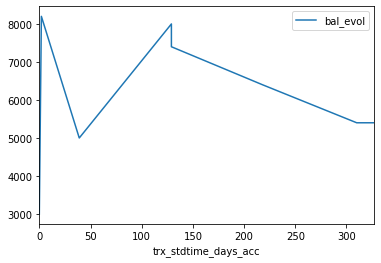

In [145]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's look at the evolution of the balance of a different account.

In [147]:
a = random.choice(dfi["account_ids"].unique())
print(a)

105137101304000000


### I used a = 105137101304000000. 

In [148]:
lna = dfi[dfi["account_ids"]==a]

In [149]:
lna.shape

(7, 59)

### Let's look at this one account.

In [150]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
201726,KELDK09,NaN,07sep2012,02oct2013,390,13,04=Diaries Interview,12jun2013,6,2013,2013_06,26jul2012,105137101304000000,1.0,56134329944600000,NaN,Liability,NaN,Informal,NaN,31may2013,02oct2013,124,4,105137101323300000,56134329944600000,31may2013,2013-05-31,5,2013,2013_05,11.0,266,9,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,1500.0,17.647060,0,NaN,NaN,NaN,9.172414
203404,KELDK09,NaN,07sep2012,02oct2013,390,13,04=Diaries Interview,26jun2013,6,2013,2013_06,26jul2012,105137101304000000,NaN,56134329944600000,NaN,Liability,NaN,Informal,NaN,31may2013,02oct2013,124,4,105137222070000000,56134329944600000,21jun2013,2013-06-21,6,2013,2013_06,12.0,287,9,21,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,1500.0,17.647060,0,NaN,NaN,NaN,9.896552
322738,KELDK09,NaN,07sep2012,02oct2013,390,13,04=Diaries Interview,24jul2013,7,2013,2013_07,26jul2012,105137101304000000,NaN,56134329944600000,NaN,Liability,NaN,Informal,NaN,31may2013,02oct2013,124,4,105137463896500000,56134329944600000,19jul2013,2013-07-19,7,2013,2013_07,14.0,315,10,49,1,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,1500.0,17.647060,0,NaN,NaN,NaN,10.862070
384189,KELDK09,NaN,07sep2012,02oct2013,390,13,04=Diaries Interview,07aug2013,8,2013,2013_08,26jul2012,105137101304000000,NaN,56134329944600000,NaN,Liability,NaN,Informal,NaN,31may2013,02oct2013,124,4,105137585066400000,56134329944600000,02aug2013,2013-08-02,8,2013,2013_08,15.0,329,11,63,2,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,1500.0,17.647060,0,NaN,NaN,NaN,11.344830
311367,KELDK09,NaN,07sep2012,02oct2013,390,13,04=Diaries Interview,21aug2013,8,2013,2013_08,26jul2012,105137101304000000,NaN,56134329944600000,NaN,Liability,NaN,Informal,NaN,31may2013,02oct2013,124,4,105137705877500000,56134329944600000,09aug2013,2013-08-09,8,2013,2013_08,16.0,336,11,70,2,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,500.0,5.882353,0,NaN,NaN,NaN,11.586210
386346,KELDK09,NaN,07sep2012,02oct2013,390,13,04=Diaries Interview,04sep2013,9,2013,2013_09,26jul2012,105137101304000000,NaN,56134329944600000,NaN,Liability,NaN,Informal,NaN,31may2013,02oct2013,124,4,105137827244100000,56134329944600000,23aug2013,2013-08-23,8,2013,2013_08,17.0,350,12,84,2,findev,"Borrowing, lending, savings or insur

In [151]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [152]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 1780.


In [153]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","trx_date2"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,trx_date2
201726,0,1500.0,2. New borrowing,Inflow,Increase,1500.0,2013-05-31
203404,21,1500.0,3. Payments,Outflow,Decrease,-1500.0,2013-06-21
322738,49,1500.0,2. New borrowing,Inflow,Increase,1500.0,2013-07-19
384189,63,1500.0,3. Payments,Outflow,Decrease,-1500.0,2013-08-02
311367,70,500.0,2. New borrowing,Inflow,Increase,500.0,2013-08-09
386346,84,500.0,3. Payments,Outflow,Decrease,-500.0,2013-08-23
1780,124,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,2013-10-02


In [154]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [155]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [156]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
201726,0,1500.0,2. New borrowing,Inflow,Increase,1500.0,1500.0
203404,21,1500.0,3. Payments,Outflow,Decrease,-1500.0,0.0
322738,49,1500.0,2. New borrowing,Inflow,Increase,1500.0,1500.0
384189,63,1500.0,3. Payments,Outflow,Decrease,-1500.0,0.0
311367,70,500.0,2. New borrowing,Inflow,Increase,500.0,500.0
386346,84,500.0,3. Payments,Outflow,Decrease,-500.0,0.0
1780,124,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0


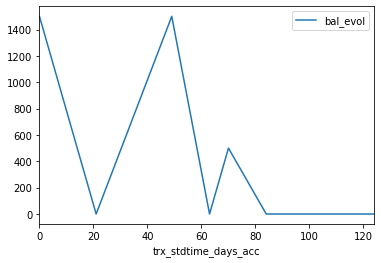

In [157]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's look at the evolution of the balance of a different account.

In [158]:
a = random.choice(dfi["account_ids"].unique())
print(a)

59135825372200000


### I used a = 59135825372200000. 

In [159]:
lna = dfi[dfi["account_ids"]==a]

In [160]:
lna.shape

(21, 59)

### Let's look at this one account.

In [162]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [164]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 20990.


In [165]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","trx_date2"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,trx_date2
285092,0,1000.0,2. New borrowing,Inflow,Increase,1000.0,2013-01-10
19868,0,200.0,5. Interest accruing,NaN,Increase,200.0,2013-01-10
3935,9,200.0,5. Interest accruing,NaN,Increase,200.0,2013-01-19
455577,9,1000.0,2. New borrowing,Inflow,Increase,1000.0,2013-01-19
455585,9,200.0,3. Payments,Outflow,Decrease,-200.0,2013-01-19
18616,9,200.0,5. Interest accruing,NaN,Increase,200.0,2013-01-19
3936,32,200.0,5. Interest accruing,NaN,Increase,200.0,2013-02-11
443210,32,1000.0,2. New borrowing,Inflow,Increase,1000.0,2013-02-11
265640,60,1000.0,2. New borrowing,Inflow,Increase,1000.0,2013-03-11
3937,60,200.0,5. Interest accruing,NaN,Increase,200.0,2013-03-11


In [166]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [167]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [168]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
285092,0,1000.0,2. New borrowing,Inflow,Increase,1000.0,1000.0
19868,0,200.0,5. Interest accruing,NaN,Increase,200.0,1200.0
3935,9,200.0,5. Interest accruing,NaN,Increase,200.0,1400.0
455577,9,1000.0,2. New borrowing,Inflow,Increase,1000.0,2400.0
455585,9,200.0,3. Payments,Outflow,Decrease,-200.0,2200.0
18616,9,200.0,5. Interest accruing,NaN,Increase,200.0,2400.0
3936,32,200.0,5. Interest accruing,NaN,Increase,200.0,2600.0
443210,32,1000.0,2. New borrowing,Inflow,Increase,1000.0,3600.0
265640,60,1000.0,2. New borrowing,Inflow,Increase,1000.0,4600.0
3937,60,200.0,5. Interest accruing,NaN,Increase,200.0,4800.0


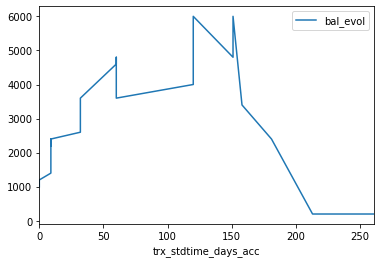

In [169]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's look at the evolution of the balance of a different account.

In [170]:
a = random.choice(dfi["account_ids"].unique())
print(a)

63135365595900000


### I used a = 63135365595900000. 

In [171]:
lna = dfi[dfi["account_ids"]==a]

In [172]:
lna.shape

(5, 59)

### Let's look at this one account.

In [173]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)
lna

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_date2,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
333279,KMAKE21,NaN,01oct2012,04oct2013,368,12,04=Diaries Interview,22nov2012,11,2012,2012_11,04oct2012,63135365595900000,NaN,63134382825300000,NaN,Liability,NaN,Informal,NaN,05nov2012,04oct2013,333,11,63135365610000000,63134382825300000,05nov2012,2012-11-05,11,2012,2012_11,4.0,35,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,07=Group meeting,Inflow,500.0,5.882353,0,NaN,NaN,NaN,1.206897
418471,KMAKE21,NaN,01oct2012,04oct2013,368,12,04=Diaries Interview,22nov2012,11,2012,2012_11,04oct2012,63135365595900000,1.0,63134382825300000,NaN,Liability,NaN,Informal,NaN,05nov2012,04oct2013,333,11,63135365621600000,63134382825300000,05nov2012,2012-11-05,11,2012,2012_11,4.0,35,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,50.0,0.588235,0,NaN,NaN,NaN,1.206897
356631,KMAKE21,NaN,01oct2012,04oct2013,368,12,04=Diaries Interview,22nov2012,11,2012,2012_11,04oct2012,63135365595900000,NaN,63134382825300000,NaN,Liability,NaN,Informal,NaN,05nov2012,04oct2013,333,11,63135365614000000,63134382825300000,19nov2012,2012-11-19,11,2012,2012_11,4.0,49,1,14,0,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,07=Group meeting,Outflow,500.0,5.882353,0,NaN,NaN,NaN,1.689655
7958,KMAKE21,NaN,01oct2012,04oct2013,368,12,06=Cleaning interview,04oct2013,10,2013,2013_10,04oct2012,63135365595900000,NaN,63134382825300000,NaN,Liability,Close,Informal,NaN,05nov2012,04oct2013,333,11,105140418553900000,63134382825300000,04oct2013,2013-10-04,10,2013,2013_10,21.0,368,12,333,11,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,12.689660
25192,KMAKE21,NaN,01oct2012,04oct2013,368,12,06=Cleaning interview,04oct2013,10,2013,2013_10,04oct2012,63135365595900000,NaN,63134382825300000,NaN,Liability,NaN,Informal,NaN,05nov2012,04oct2013,333,11,105140418549100000,63134382825300000,04oct2013,2013-10-04,10,2013,2013_10,21.0,368,12,333,11,findev,"Borrowing, lending, savings or insurance media...",INFGRP,Informal group,3395,Borrowing from an informal Group,INCREASE--Unexplained balance adjustment,NaN,0.0,Increase,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,50.0,0.588235,0,NaN,NaN,NaN,12.689660


In [174]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [175]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 7958.


In [176]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","trx_date2"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,trx_date2
333279,0,500.0,2. New borrowing,Inflow,Increase,500.0,2012-11-05
418471,0,50.0,3. Payments,Outflow,Decrease,-50.0,2012-11-05
356631,14,500.0,3. Payments,Outflow,Decrease,-500.0,2012-11-19
7958,333,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,2013-10-04
25192,333,50.0,INCREASE--Unexplained balance adjustment,NaN,Increase,50.0,2013-10-04


In [177]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [178]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [179]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
333279,0,500.0,2. New borrowing,Inflow,Increase,500.0,500.0
418471,0,50.0,3. Payments,Outflow,Decrease,-50.0,450.0
356631,14,500.0,3. Payments,Outflow,Decrease,-500.0,-50.0
7958,333,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,-50.0
25192,333,50.0,INCREASE--Unexplained balance adjustment,NaN,Increase,50.0,0.0


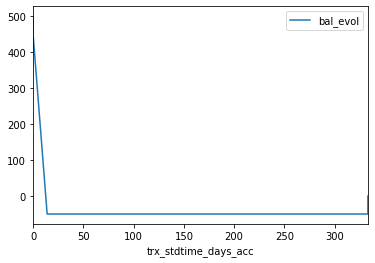

In [180]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's look at the evolution of the balance of a different account.

In [184]:
a = random.choice(dfi["account_ids"].unique())
print(a)

59135520912300000


### I used a = 59135520912300000. 

In [185]:
lna = dfi[dfi["account_ids"]==a]

In [186]:
lna.shape

(10, 59)

### Let's look at this one account.

In [188]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [190]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index " + str(index)+".")

Error neither increase nor decrease at index 2931.


In [191]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","trx_date2"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,trx_date2
15694,0,3000.0,1. Starting balance (today),NaN,Increase,3000.0,2012-11-02
296957,67,2000.0,3. Payments,Outflow,Decrease,-2000.0,2013-01-08
426832,130,400.0,3. Payments,Outflow,Decrease,-400.0,2013-03-12
455607,165,400.0,3. Payments,Outflow,Decrease,-400.0,2013-04-16
111664,193,400.0,5. Interest accruing,NaN,Increase,400.0,2013-05-14
432386,193,400.0,3. Payments,Outflow,Decrease,-400.0,2013-05-14
3131,221,1000.0,5. Interest accruing,NaN,Increase,1000.0,2013-06-11
187942,256,680.0,3. Payments,Outflow,Decrease,-680.0,2013-07-16
455604,283,520.0,3. Payments,Outflow,Decrease,-520.0,2013-08-12
2931,327,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,2013-09-25


In [192]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [193]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [194]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
15694,0,3000.0,1. Starting balance (today),NaN,Increase,3000.0,3000.0
296957,67,2000.0,3. Payments,Outflow,Decrease,-2000.0,1000.0
426832,130,400.0,3. Payments,Outflow,Decrease,-400.0,600.0
455607,165,400.0,3. Payments,Outflow,Decrease,-400.0,200.0
111664,193,400.0,5. Interest accruing,NaN,Increase,400.0,600.0
432386,193,400.0,3. Payments,Outflow,Decrease,-400.0,200.0
3131,221,1000.0,5. Interest accruing,NaN,Increase,1000.0,1200.0
187942,256,680.0,3. Payments,Outflow,Decrease,-680.0,520.0
455604,283,520.0,3. Payments,Outflow,Decrease,-520.0,0.0
2931,327,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0


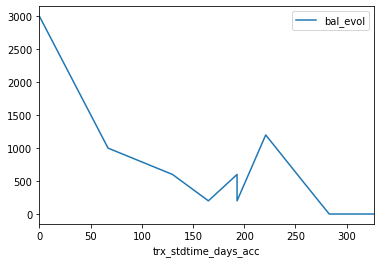

In [195]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Further steps: 
## 1. Check how often an "unexplained balance adjustment" occured.
## 2. Check how often the balance of the loan got negative.